In [2]:
library(ggplot2)
df <- read.csv(file = '/Users/rogerfu/Dropbox/my_classes/EPS_102_2021/Rogers_lectures/timeseries/SOI2.csv', stringsAsFactors = FALSE)
df1 <- data.frame(time=(df$year)+(df$month)/12,SOI=df$SOI)
df2 <- data.frame(time=(df$year-1940)*12+df$month,SOI=df$SOI)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


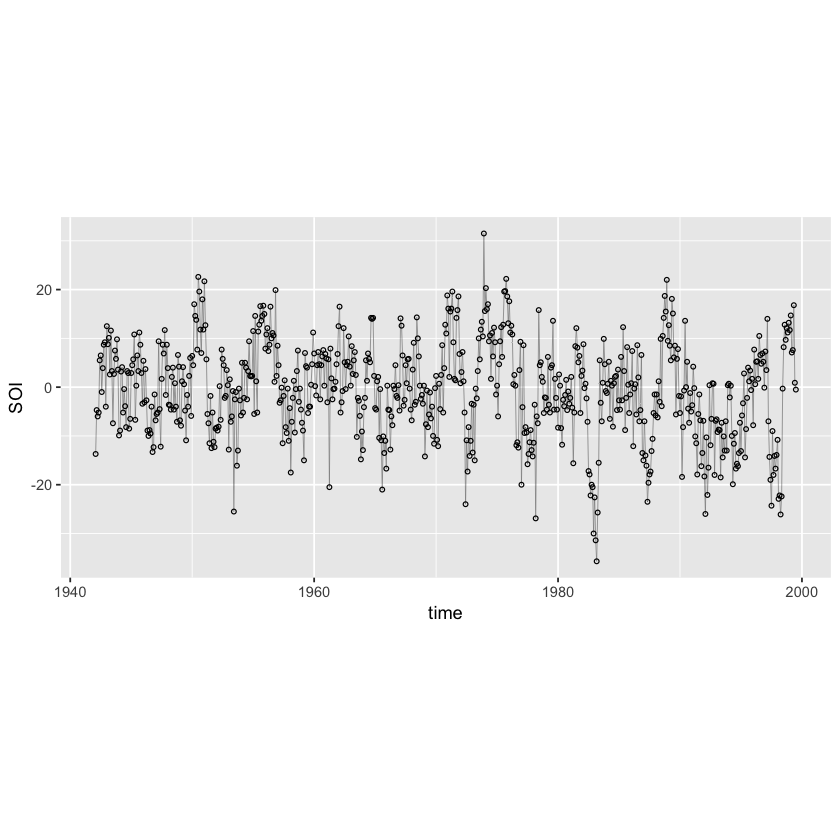

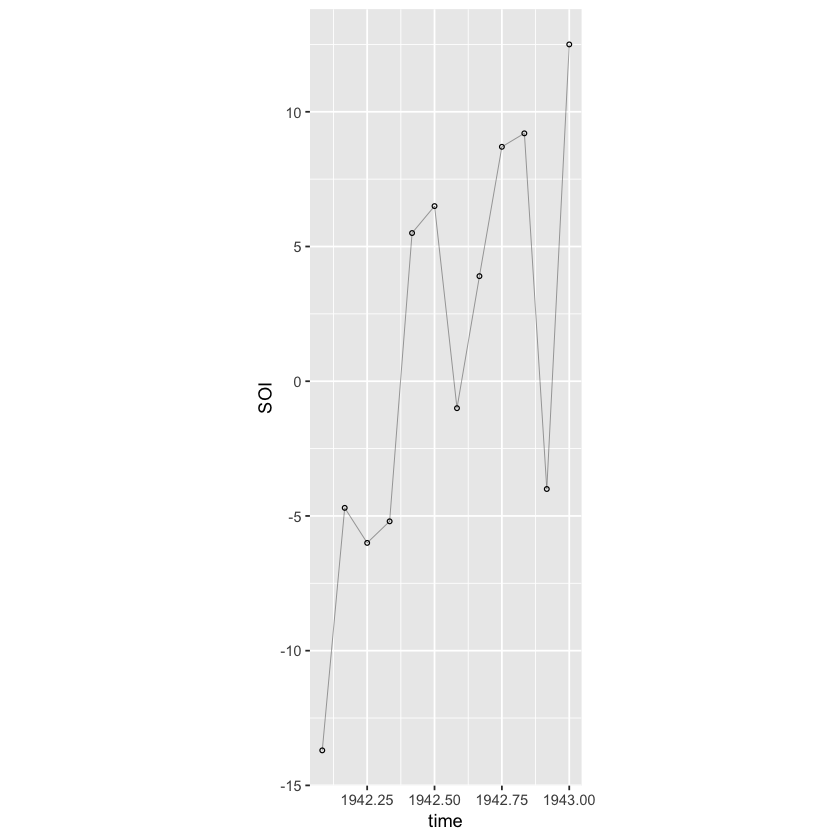

In [8]:
ggplot(df1, aes(x=time, y=SOI)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .4)   

ggplot(df1[1:12,], aes(x=time, y=SOI)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .1)   

In [ ]:
## Blackman and Tukey

In [39]:
lagEstimate <-function(x,k,N=length(x)){
   (1/N)*sum(x[1:(N-k)]*x[(k+1):N])
}

Lags <-function(x,kMax) {
  sapply(0:kMax,lagEstimate,x=x)
}

acsWindowed <- function(x,kMax,Nzero=0){
  rHalf <- c(Lags(x,kMax),rep(0,Nzero))
  c(rev(rHalf[2:length(rHalf)]),rHalf)
}

BartlettWindow <- function(N,n=seq(0, (N-1)))  {
  1 - abs( (n-(N-1)/2) / ( (N-1)/2) )
}

Btse <- function(rHat,Wb) {
  Re(fft(rHat*Wb))
}

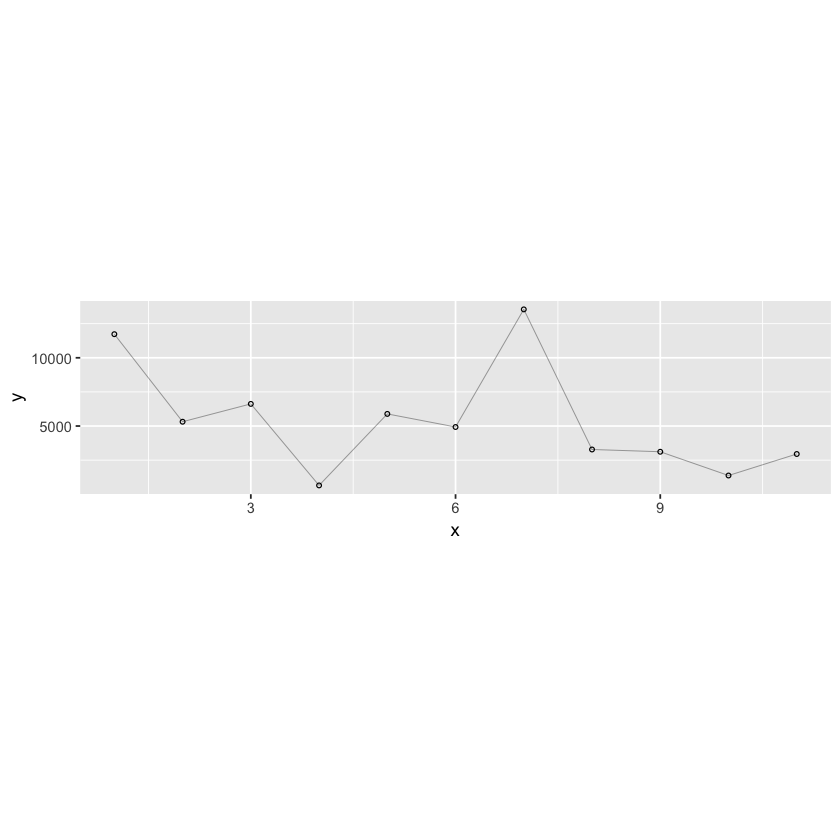

In [85]:
#dfwindow<-data.frame(x=1:11,y=BartlettWindow(11))
dfwindow<-data.frame(x=1:11,y=abs(fft(df2$SOI)^2)[1:11])

ggplot(dfwindow, aes(x=x, y=y)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .0002)   

[1] 201

[1] 842

[1] 201

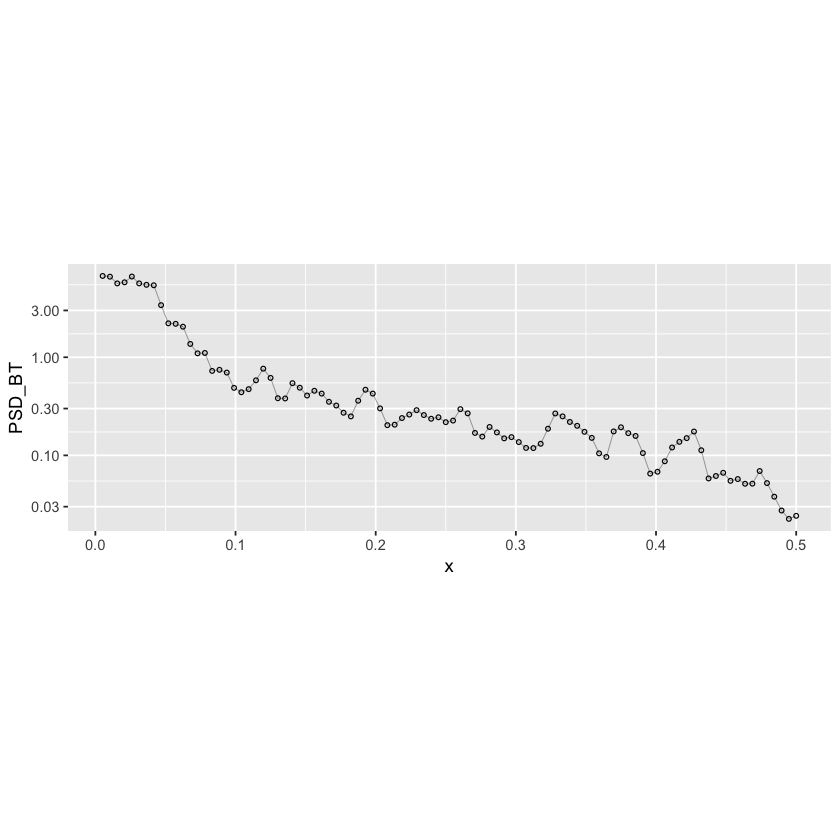

In [112]:
rHat   <- acsWindowed(df1$SOI,kMax=100)
Wb     <- BartlettWindow(length(rHat))
Pbtse9 <- Btse(rHat,Wb)
length(rHat)
nrow(df2)
length(Pbtse9)
NN<-round(length(Pbtse9)/2-4)
dfBT<-data.frame(x=(1:(NN))/(2*NN),PSD_BT=abs(Pbtse9[1:NN]))

ggplot(dfBT, aes(x=x, y=PSD_BT)) +
  geom_point(size=1, shape=1) +
  scale_y_continuous(trans='log10') +
  geom_line(size=.1)+
  coord_fixed(ratio = .07)   

## Multitaper

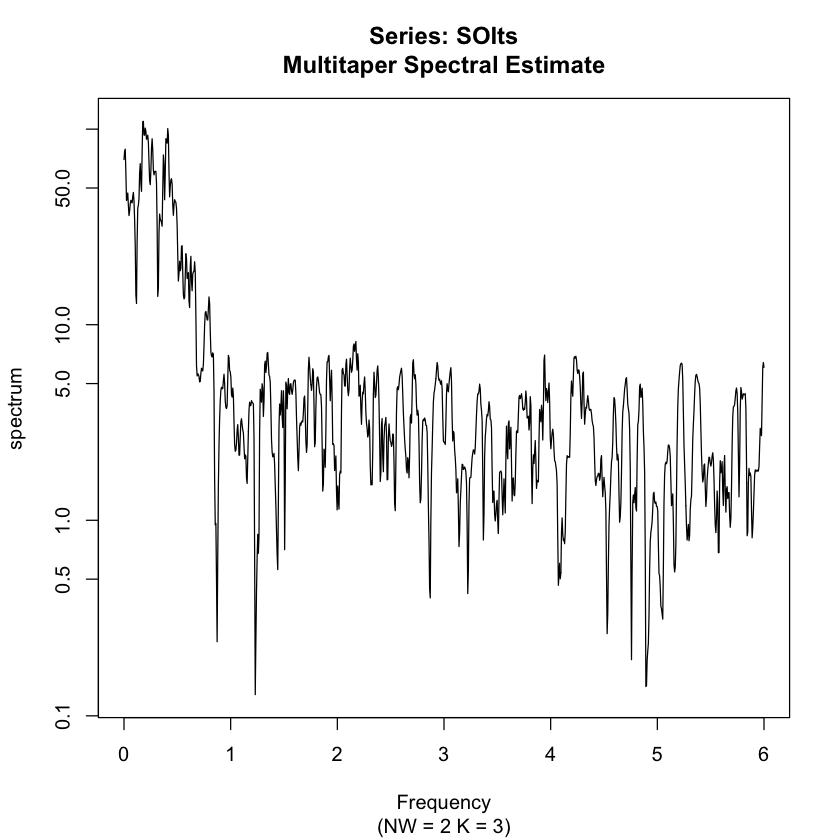

In [18]:
library(multitaper)
#recast the El Niño time series as a time series object in R
SOIts<-ts(data=df1$SOI,frequency = 12, start = c(1951, 1))
#define the bandwidth parameter
nw=2
spec.mtm(SOIts,nw=nw,k=3)

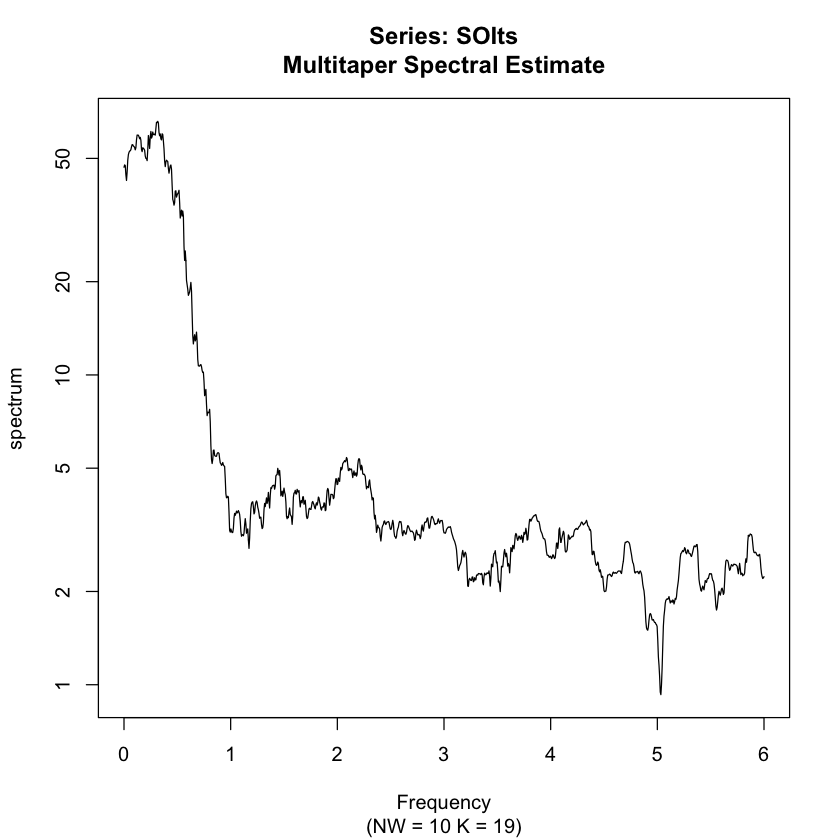

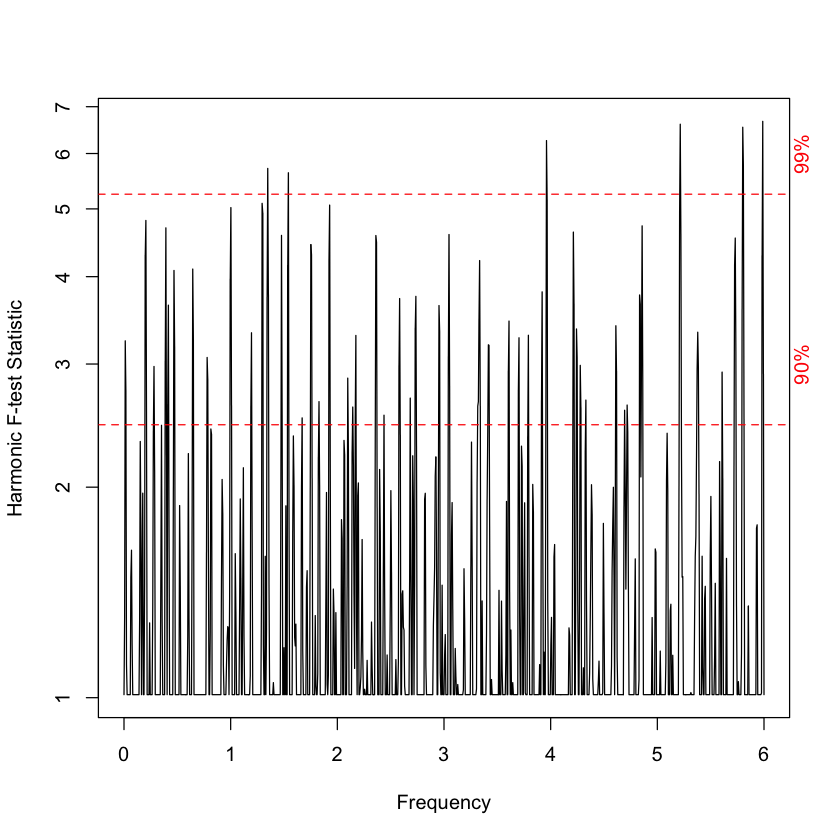

In [24]:
nw=10.0
p10<-spec.mtm(SOIts,nw=nw,k=nw*2-1,Ftest=TRUE,plot=FALSE)
plot(p10)
plot(p10,Ftest=TRUE,siglines=c(0.90, 0.99))

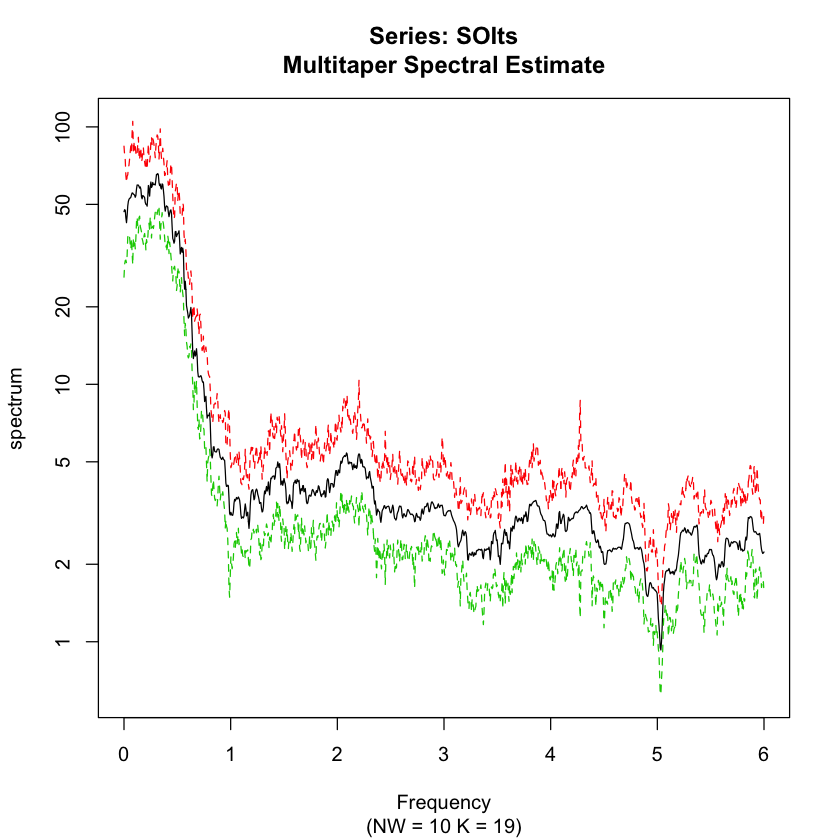

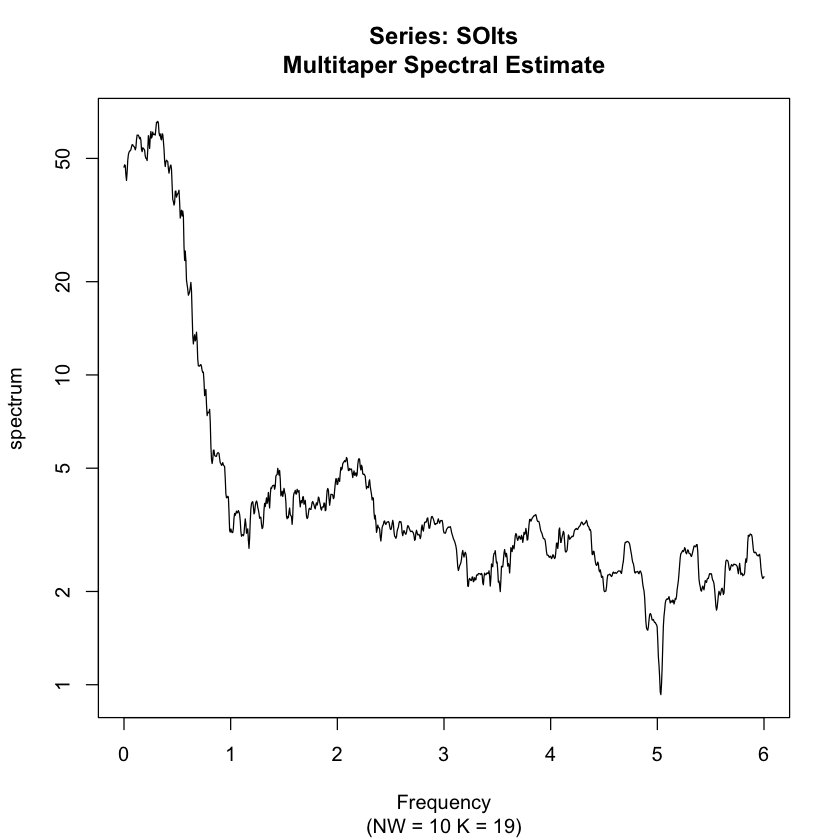

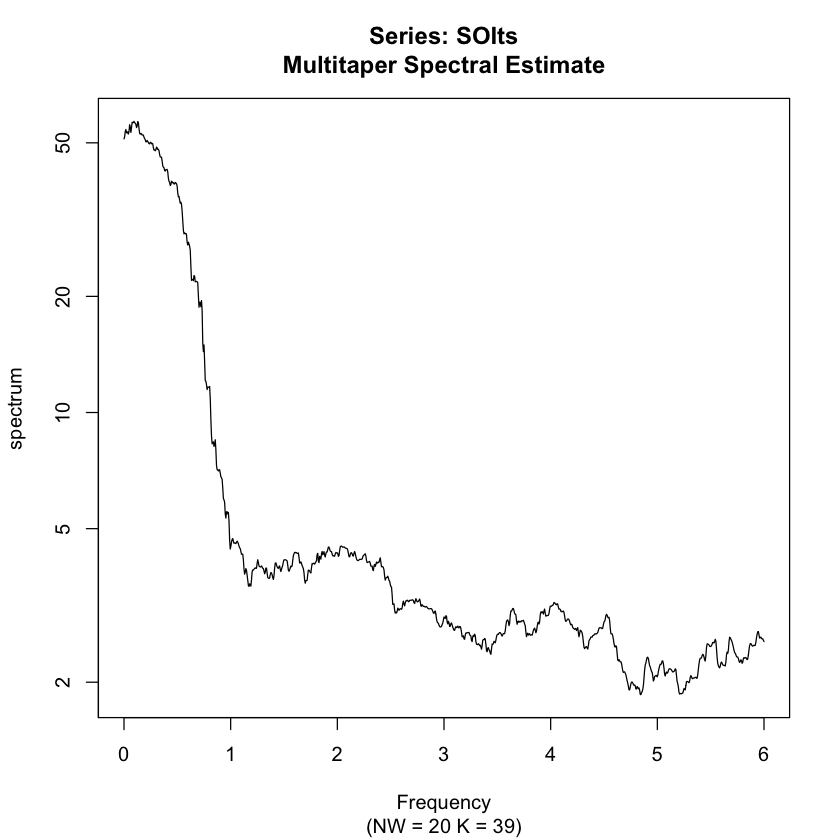

In [25]:
nw=10
mtmout<-spec.mtm(SOIts,nw=nw,k=nw*2-1,jackknife=TRUE)
plot.mtm(mtmout,log='yes')
nw=20.0
spec.mtm(SOIts,nw=nw,k=nw*2-1)

## astrochron

In [3]:
install.packages('astrochron', repos='http://cran.us.r-project.org')

Warning message:
“unable to access index for repository http://cran.us.r-project.org/src/contrib:
  cannot open URL 'http://cran.us.r-project.org/src/contrib/PACKAGES'”Warning message:
“package ‘astrochron’ is not available (for R version 3.6.1)”

In [1]:
install.packages('dplR','/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library')

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘matrixStats’, ‘png’, ‘R.utils’, ‘XML’, ‘signal’

Warning message in install.packages("dplR", "/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library"):
“installation of package ‘matrixStats’ had non-zero exit status”Warning message in install.packages("dplR", "/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library"):
“installation of package ‘png’ had non-zero exit status”Warning message in install.packages("dplR", "/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library"):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages("dplR", "/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library"):
“installation of package ‘signal’ had non-zero exit status”Warning message in install.packages("dplR", "/Users/rogerfu/anaconda3/envs/r-tutorial/lib/R/library"):
“installation of package ‘dplR’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [26]:
install.packages('astrochron','/Users/rogerfu/anaconda3/lib/R/library')

also installing the dependencies ‘dotCall64’, ‘spam’, ‘fields’, ‘IDPmisc’

Warning message in install.packages("astrochron", "/Users/rogerfu/anaconda3/lib/R/library"):
“installation of package ‘dotCall64’ had non-zero exit status”Warning message in install.packages("astrochron", "/Users/rogerfu/anaconda3/lib/R/library"):
“installation of package ‘IDPmisc’ had non-zero exit status”Warning message in install.packages("astrochron", "/Users/rogerfu/anaconda3/lib/R/library"):
“installation of package ‘spam’ had non-zero exit status”Warning message in install.packages("astrochron", "/Users/rogerfu/anaconda3/lib/R/library"):
“installation of package ‘fields’ had non-zero exit status”Warning message in install.packages("astrochron", "/Users/rogerfu/anaconda3/lib/R/library"):
“installation of package ‘astrochron’ had non-zero exit status”

In [27]:
library(astrochron)

ERROR: Error in library(astrochron): there is no package called ‘astrochron’


## Explaining Fourier

In [3]:
N <- nrow(df2)
Peridf2 <- (1/N)*abs(fft(df2$SOI)^2)
f    <- seq(0,1.0-1/N,by=1/N)

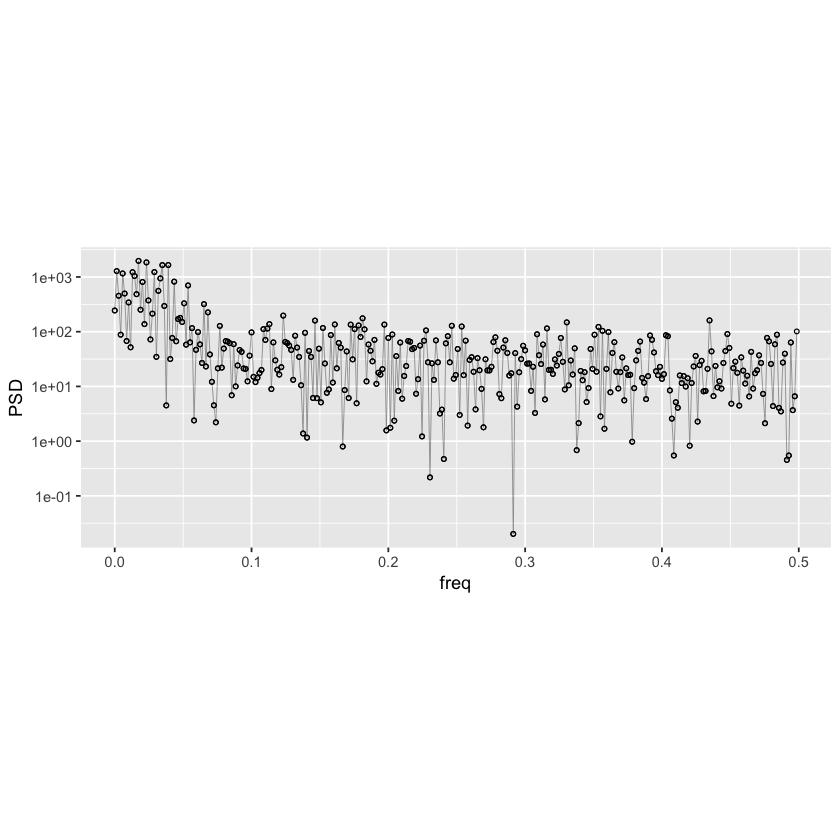

In [4]:
dfPeri <- data.frame(freq=f[1:N/2],PSD=Peridf2[1:N/2])
ggplot(dfPeri, aes(x=freq, y=PSD)) +
  scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .04)  

In [150]:
1/12

[1] 0.08333333

[1]  11.40750 118.20060  33.03000  11.02417  67.53000  67.01273  89.10750
 [8]  67.01273  67.53000  11.02417  33.03000 118.20060

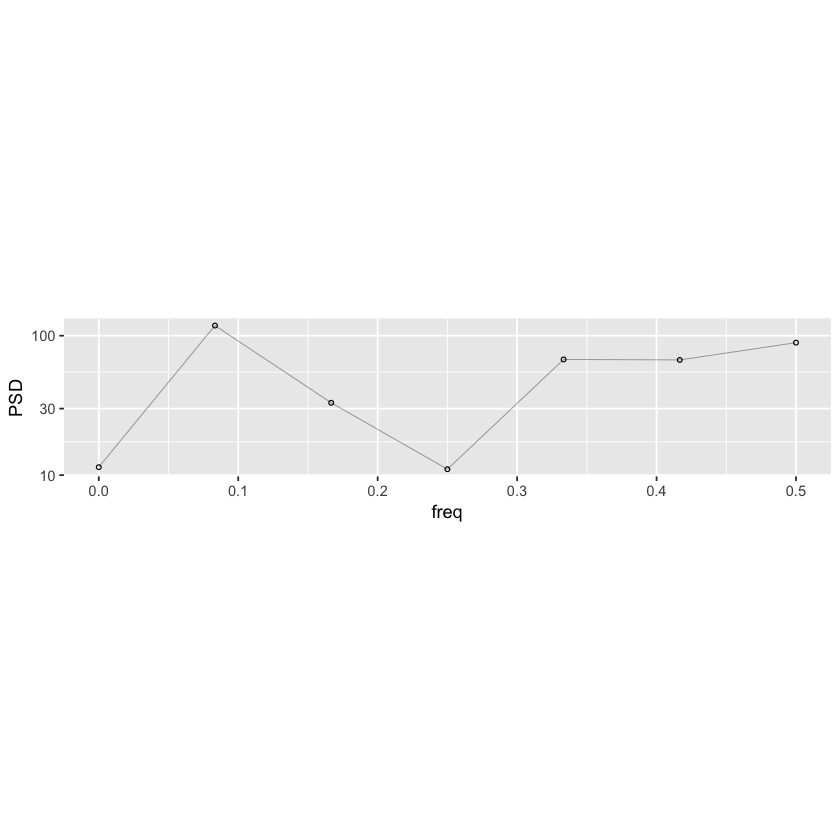

In [9]:
df3<-df1[1:12,]
N <- nrow(df3)
Peridf2 <- (1/N)*abs(fft(df3$SOI))^2
Peridf2
f    <- seq(0,1.0-1/N,by=1/N)
dfPeri <- data.frame(freq=f[1:7],PSD=Peridf2[1:7])
ggplot(dfPeri, aes(x=freq, y=PSD)) +
  scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .1)  

In [10]:
df3
fft(df3$SOI)

time,SOI
1942.083,-13.7
1942.167,-4.7
1942.250,-6.0
1942.333,-5.2
1942.417,5.5
1942.500,6.5
1942.583,-1.0
1942.667,3.9
1942.750,8.7
1942.833,9.2


[1]  11.70000+ 0.00000i -27.05167+26.20333i -11.70000+16.10807i
 [4]  11.50000+ 0.20000i -21.90000+18.18653i -22.54833+17.19667i
 [7] -32.70000+ 0.00000i -22.54833-17.19667i -21.90000-18.18653i
[10]  11.50000- 0.20000i -11.70000-16.10807i -27.05167-26.20333i

[1] 0


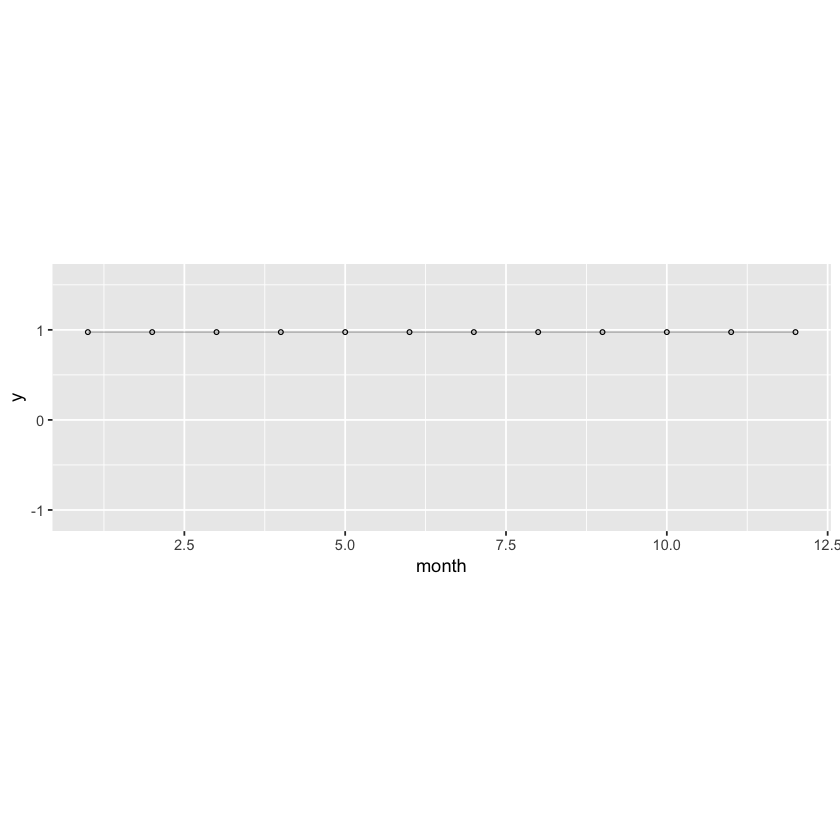

[1] 1


Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

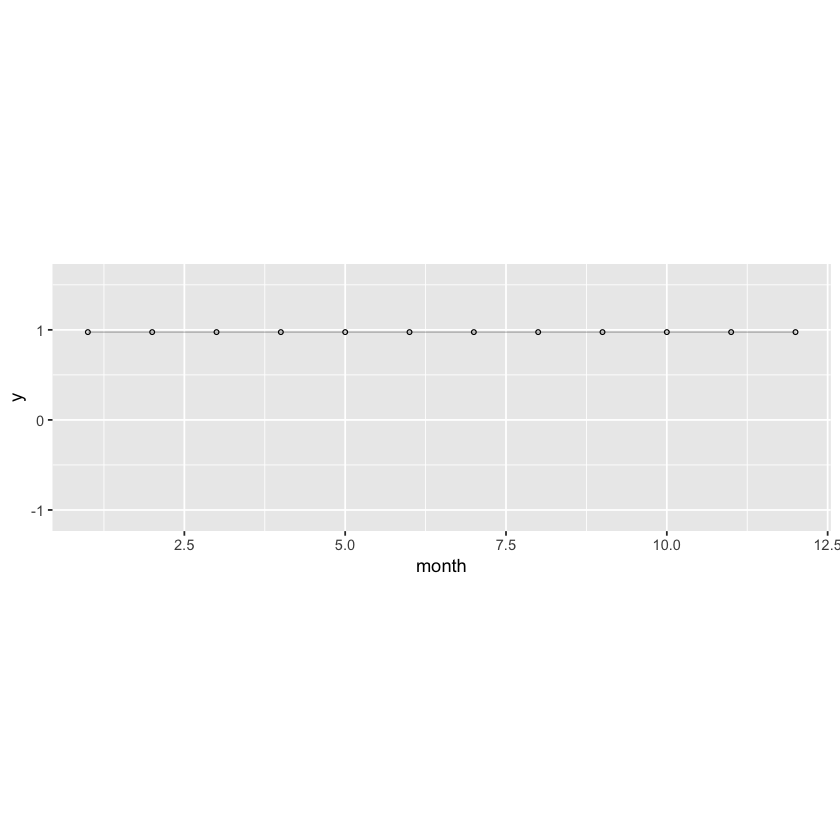

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

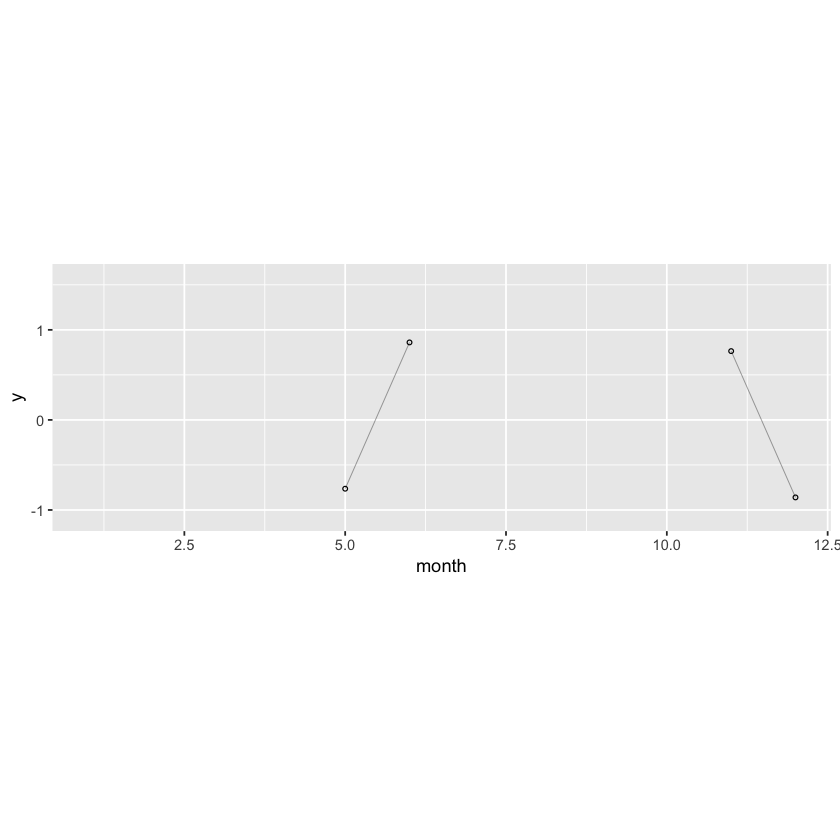

[1] 2


Warning message:
“Removed 4 rows containing missing values (geom_point).”

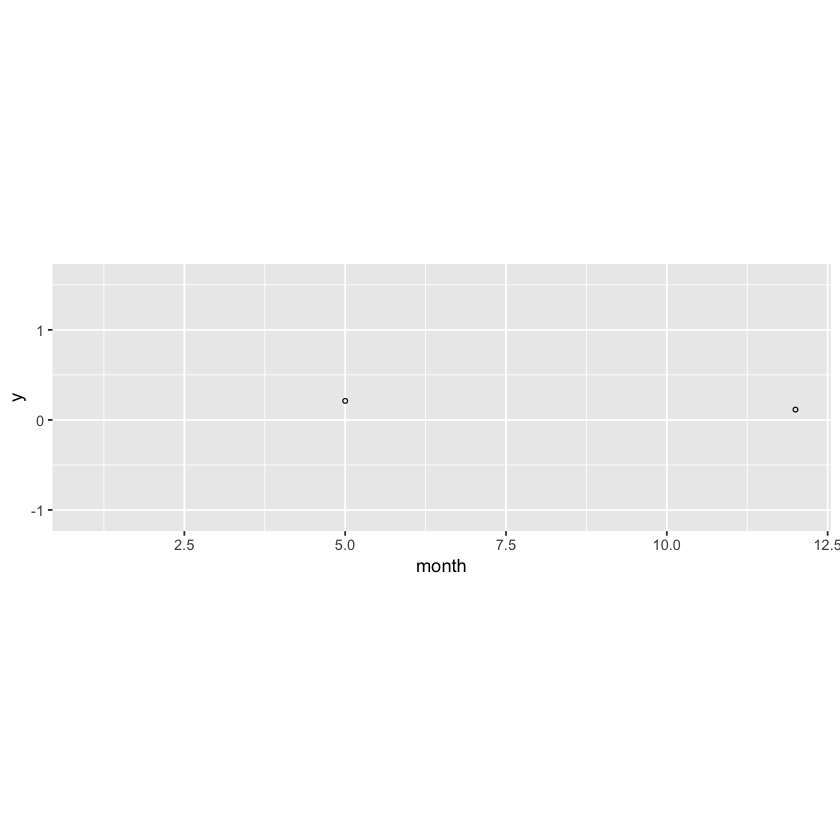

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_path).”

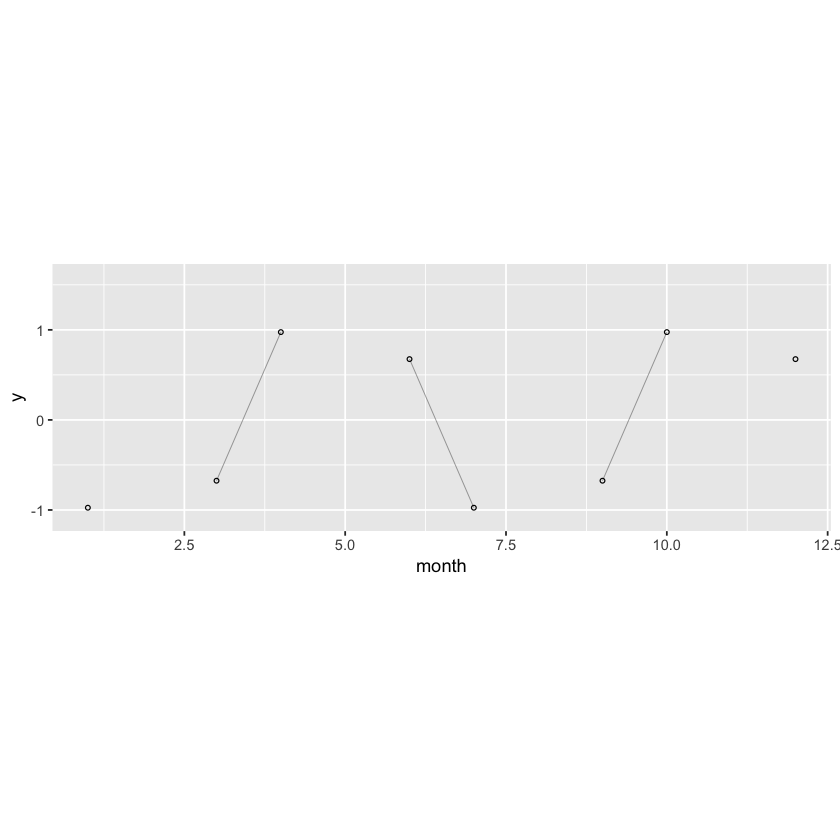

[1] 3


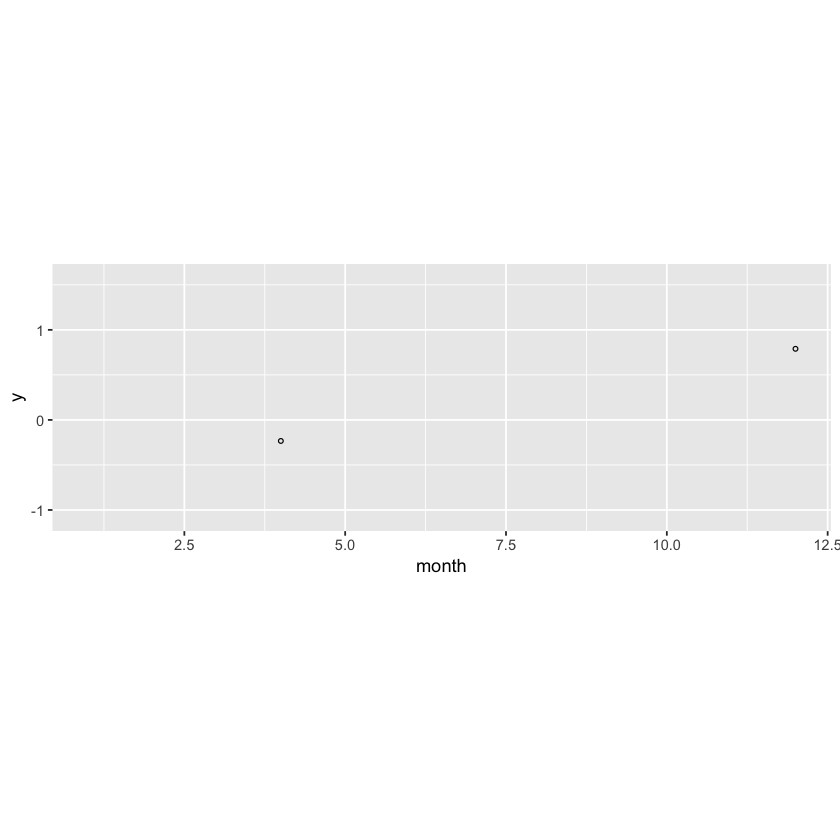

Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_path).”

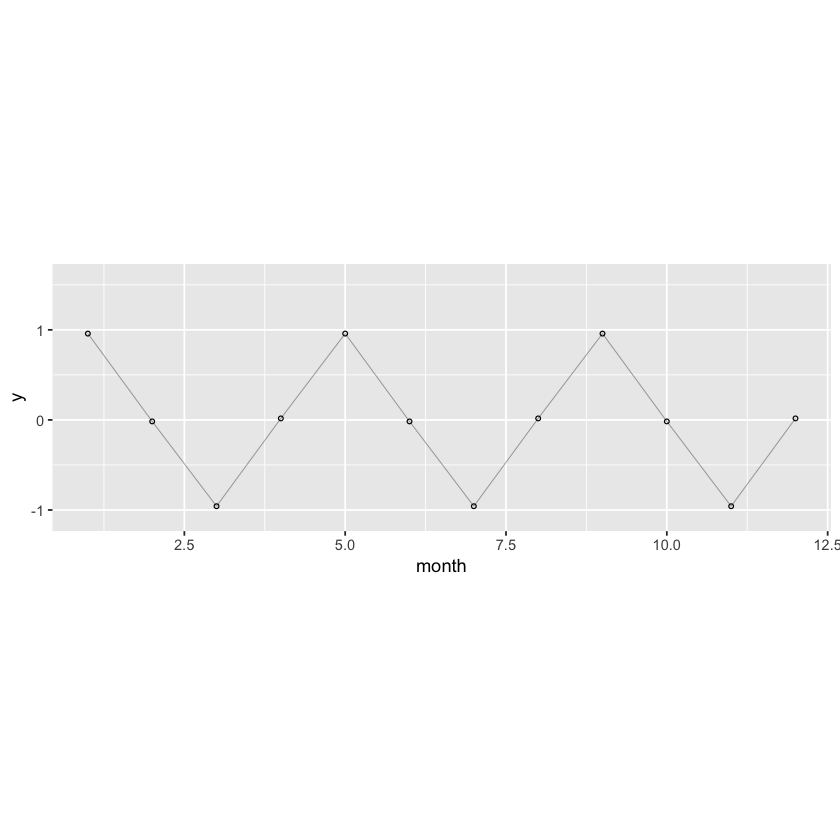

[1] 4


Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_path).”

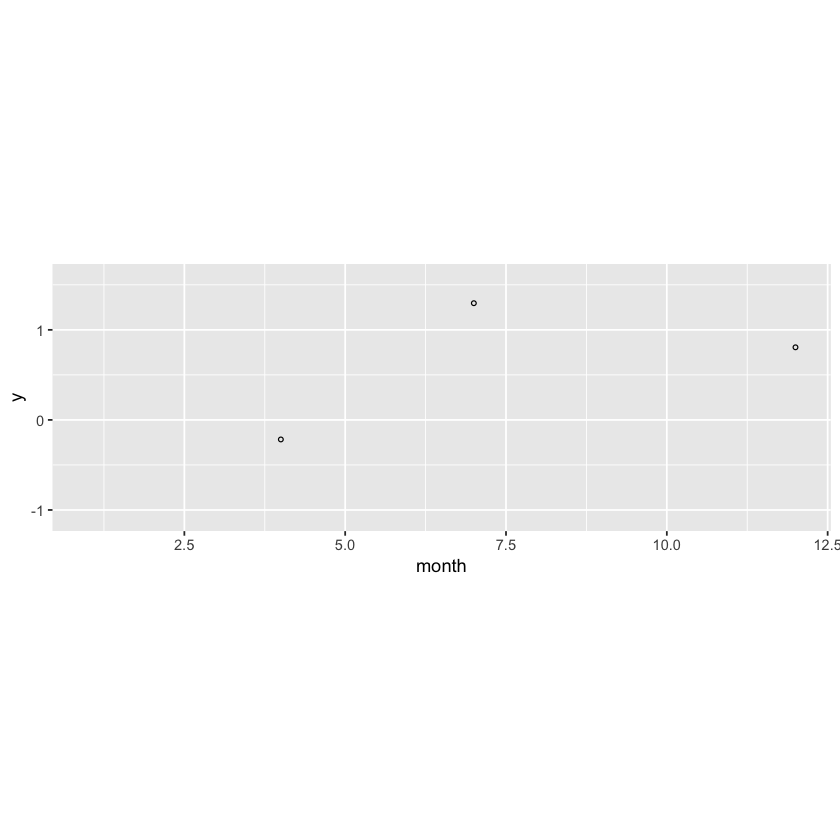

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_path).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


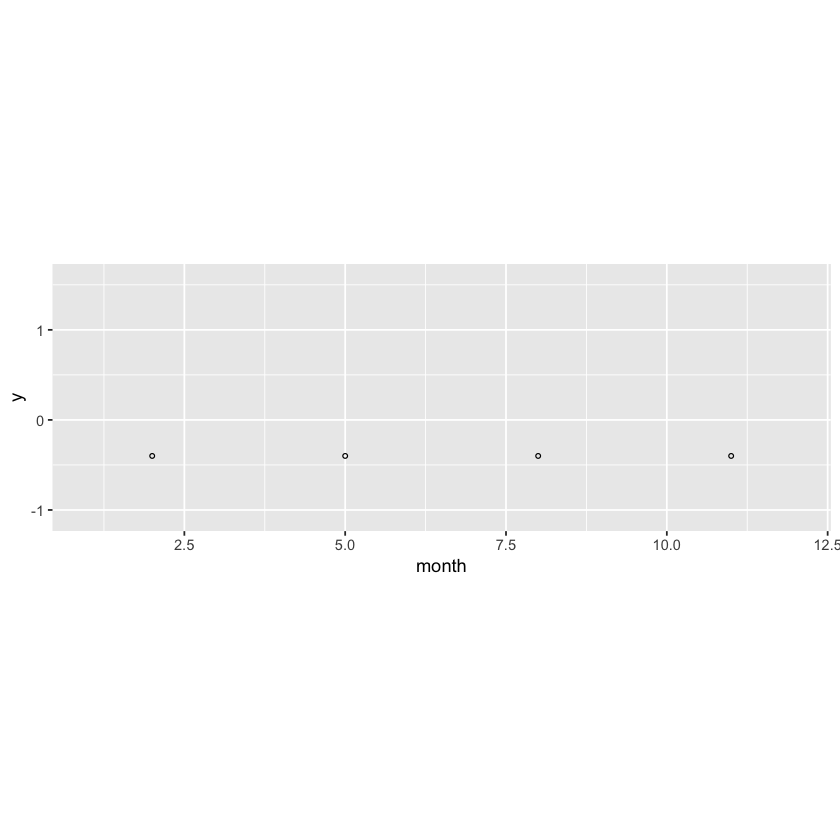

[1] 5


Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_path).”

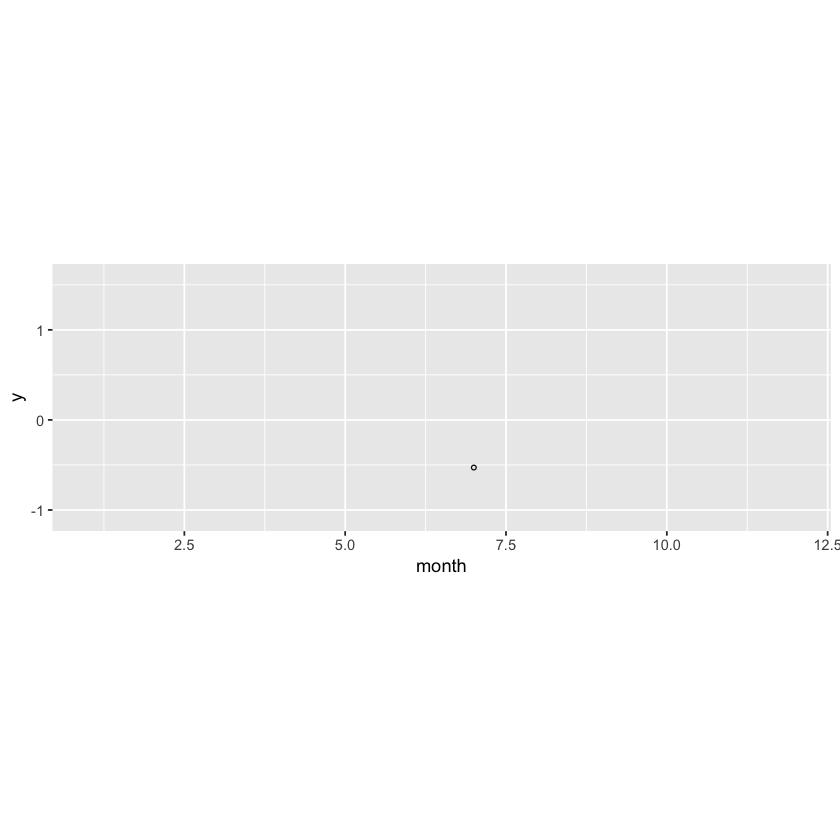

Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_path).”

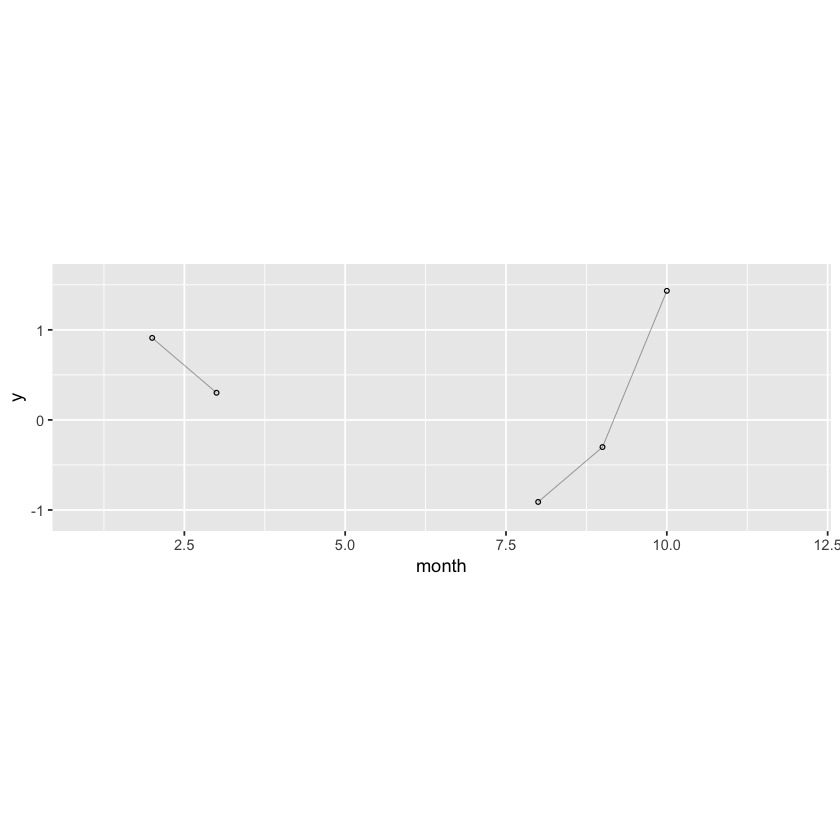

[1] 6


Warning message:
“Removed 12 rows containing missing values (geom_point).”Warning message:
“Removed 12 rows containing missing values (geom_path).”

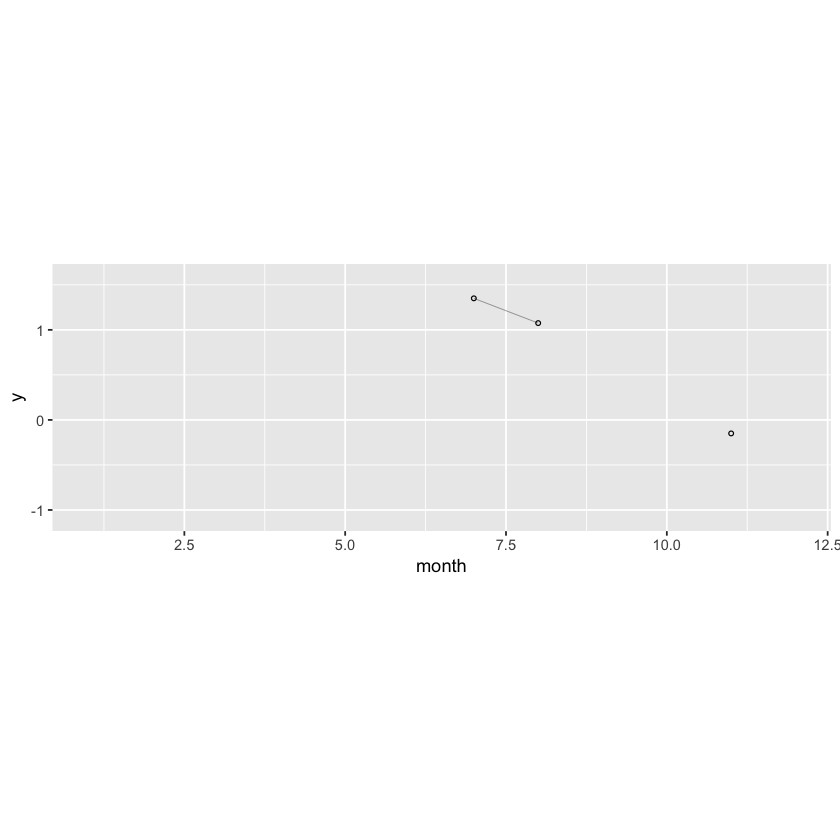

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_path).”

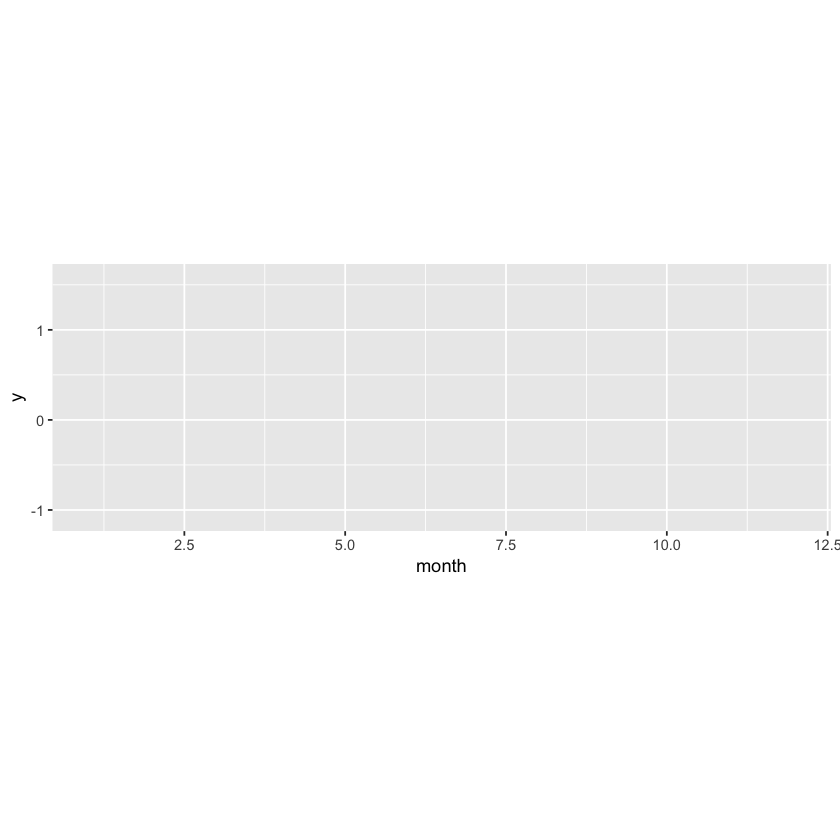

[1] 7


Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_path).”

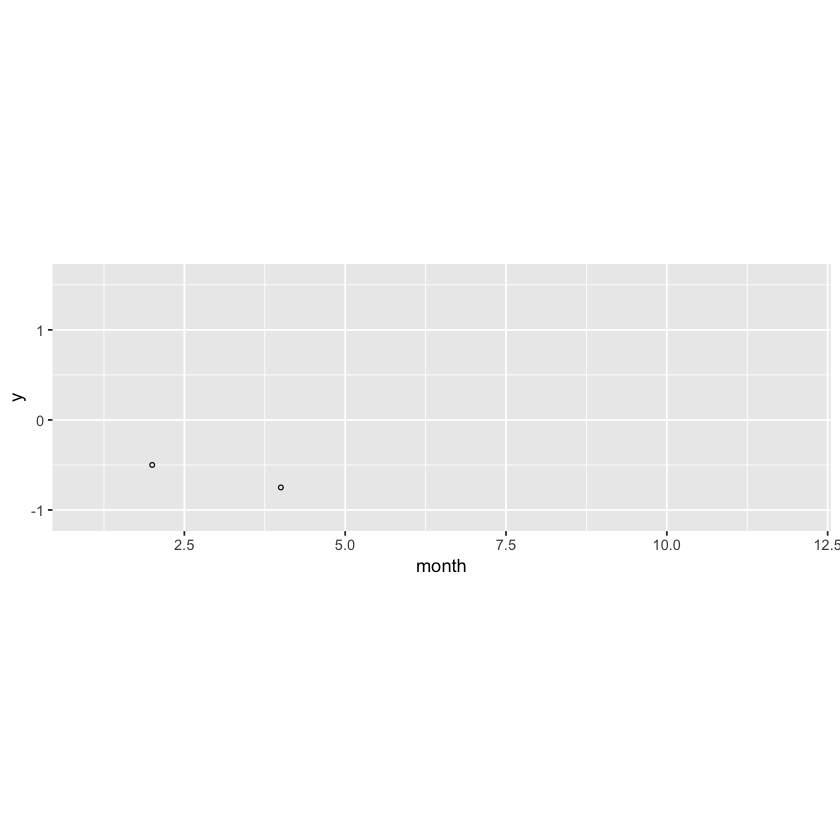

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_path).”

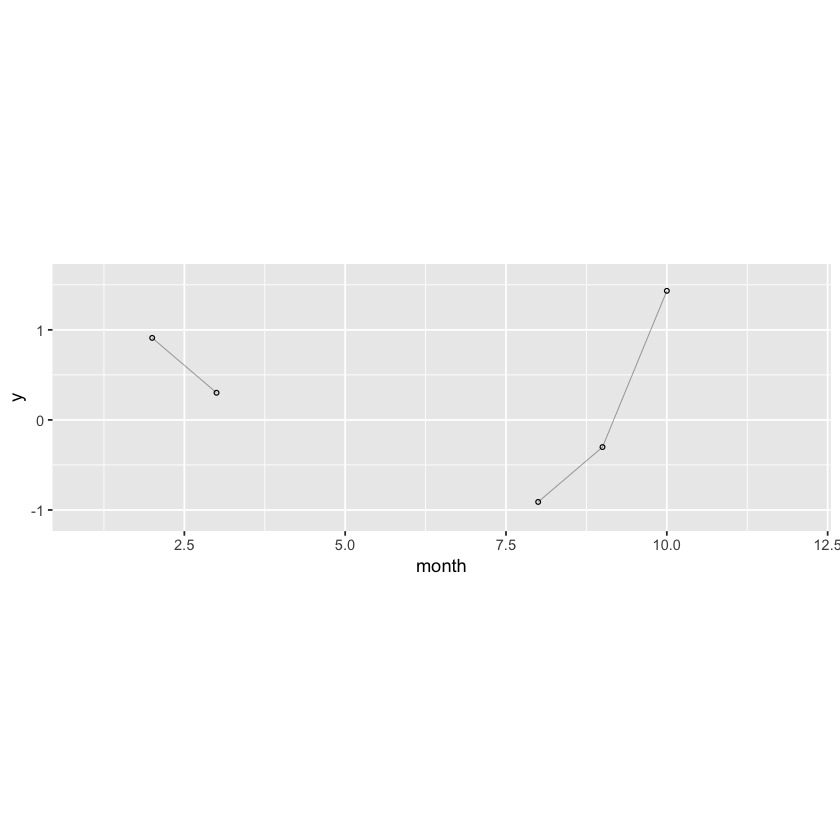

[1] 8


Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_path).”

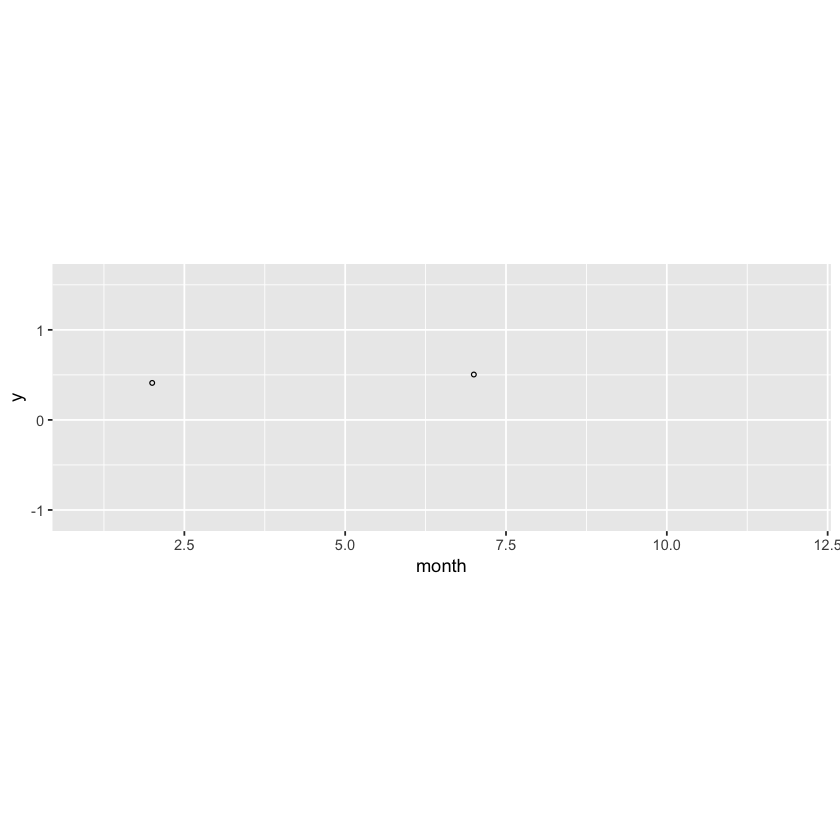

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_path).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


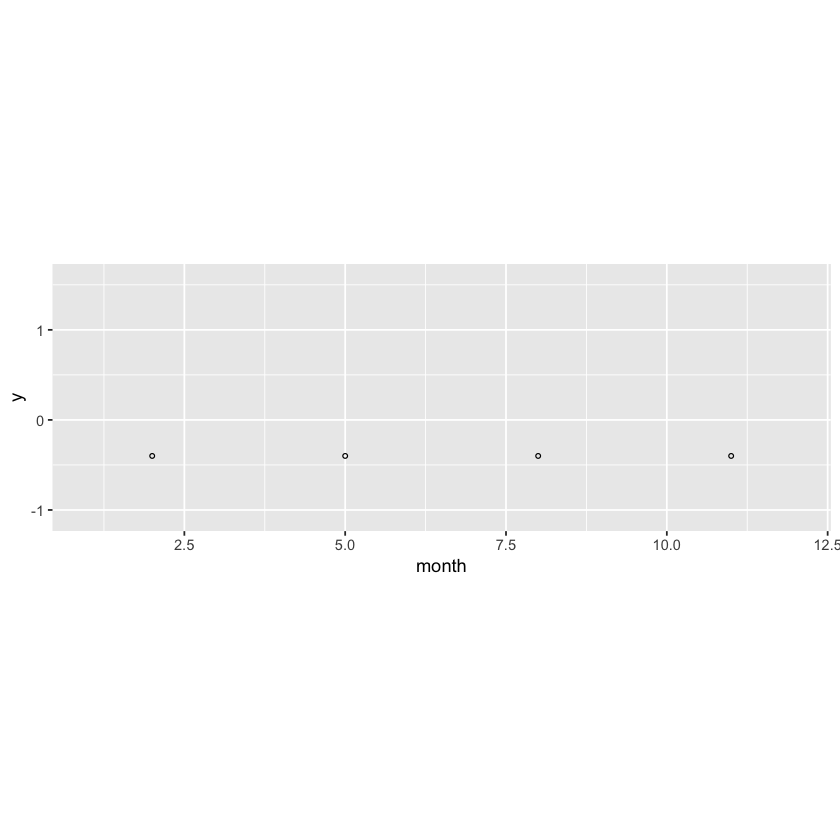

[1] 9


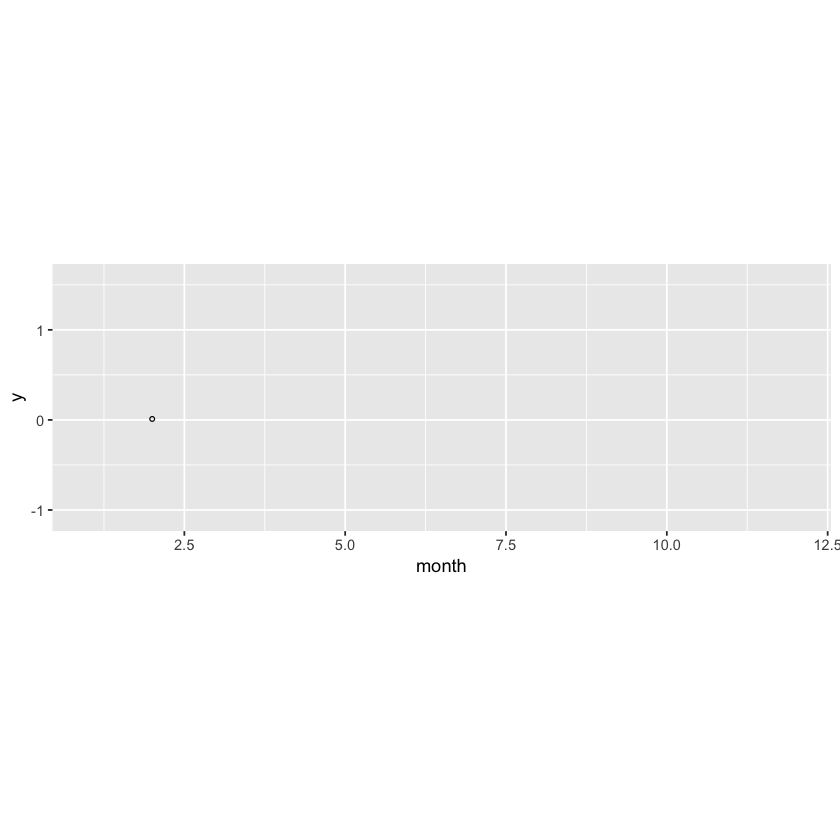

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_path).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


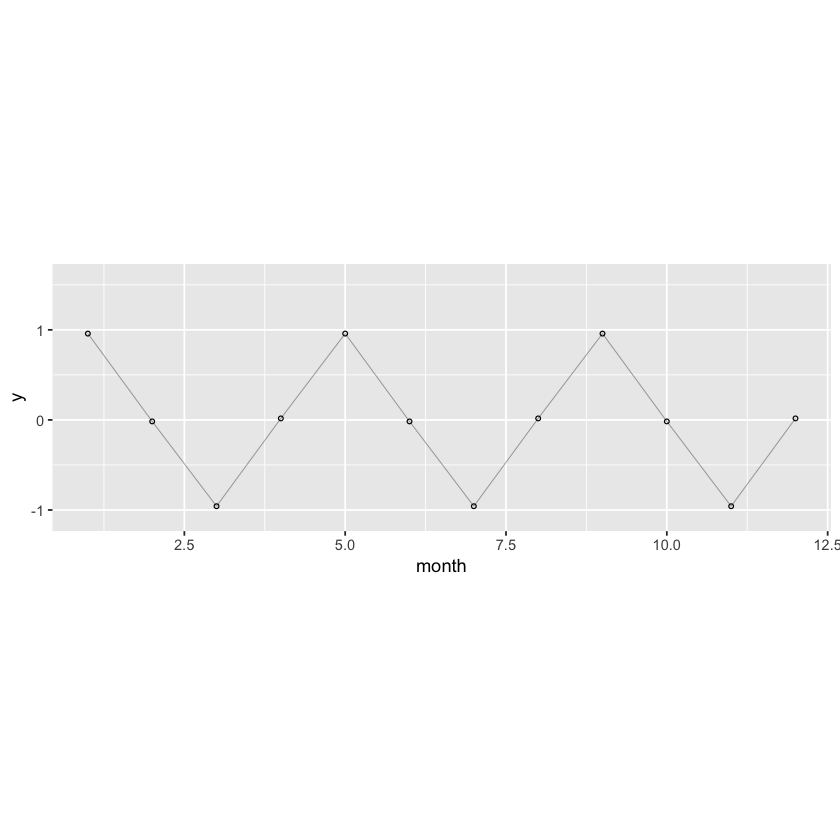

[1] 10


Warning message:
“Removed 4 rows containing missing values (geom_point).”

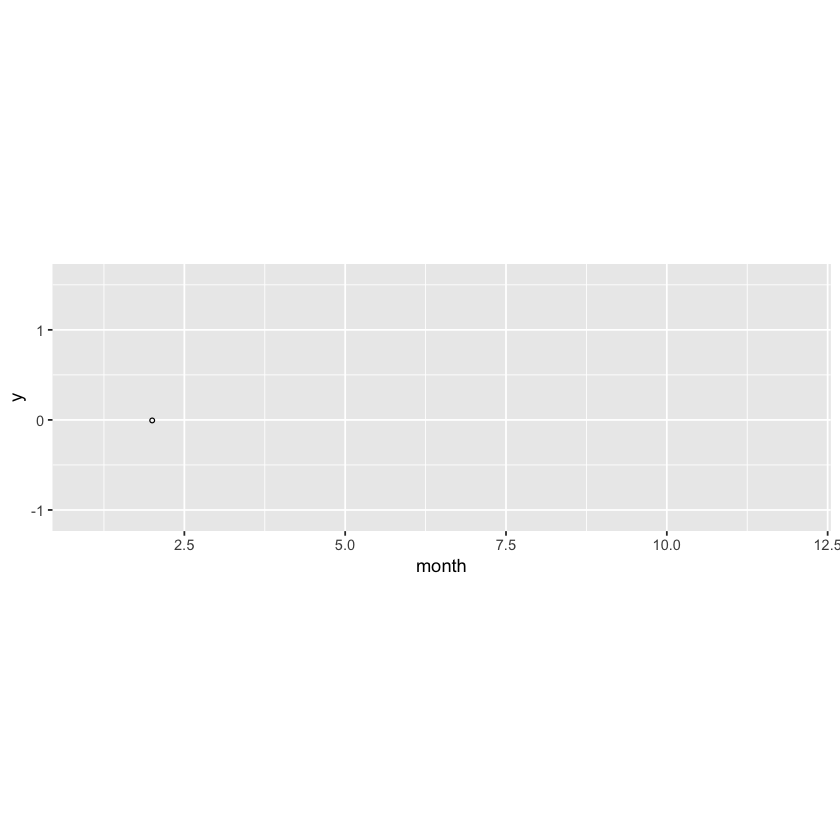

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_path).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


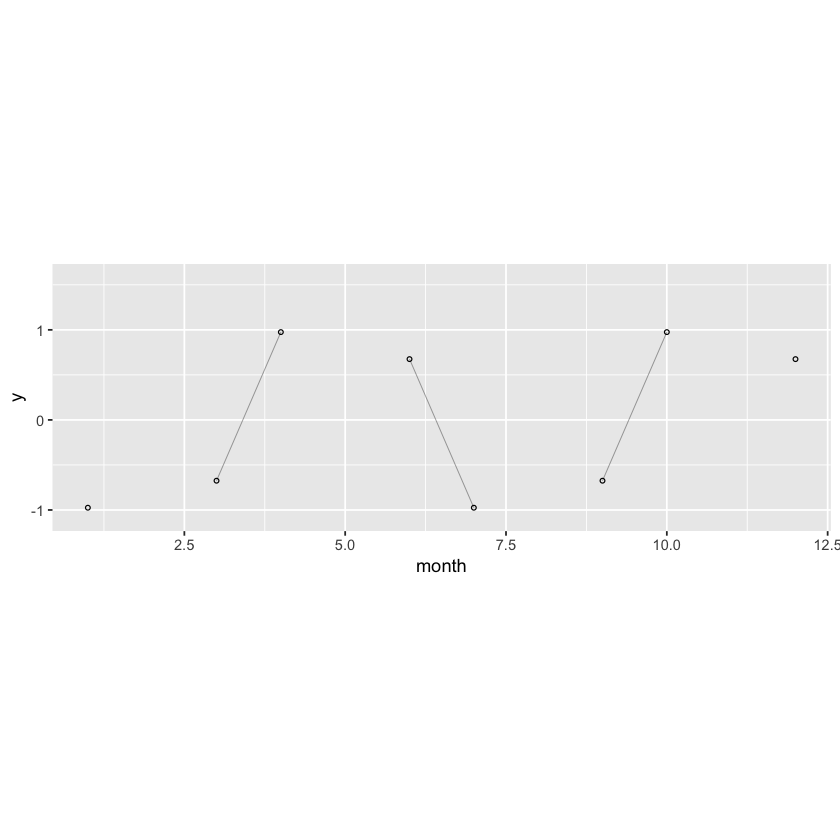

[1] 11


Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

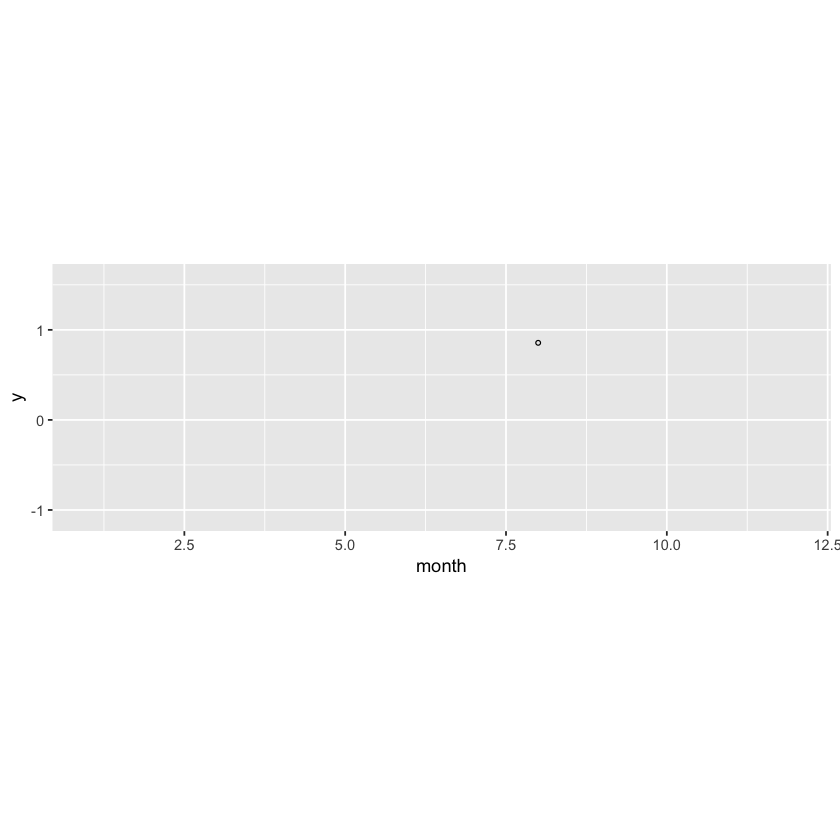

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_path).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


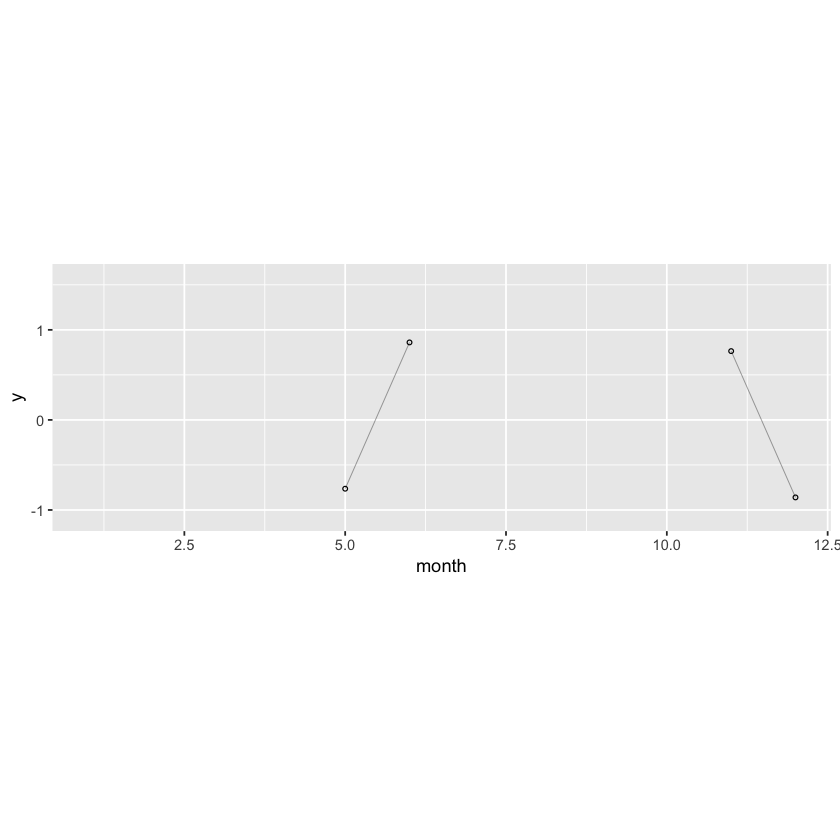

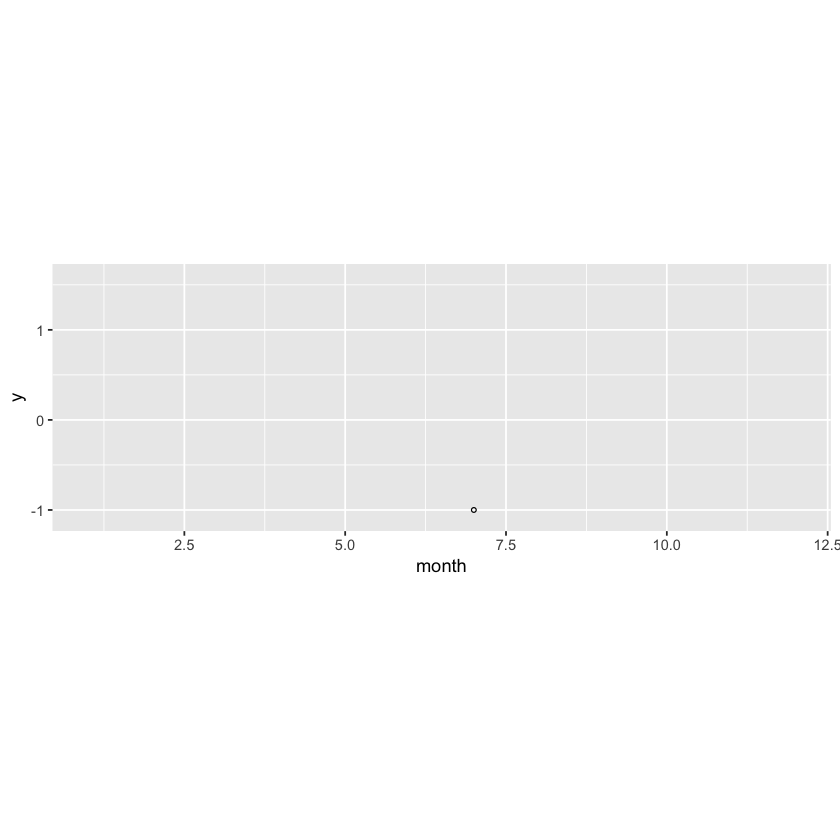

In [7]:

dfplot<-data.frame(x=1:12, y=0)

for (k in 0:11){
    cosW=sum(df3$SOI * cos(2 * pi * k * 0:11 / N))
    sinW=sum(df3$SOI * sin(2 * pi * k * 0:11 / N))
    dfplot2<-data.frame(month=1:12, y=dfplot$y+(cosW*cos(2 * pi * k * 0:11 / N)+sinW*sin(2 * pi * k * 0:11 / N))/N)
    dfplot3<-data.frame(month=1:12, y=(cosW*cos(2 * pi * k * 0:11 / N)+sinW*sin(2 * pi * k * 0:11 / N))/N)
    dfplot=dfplot2

    outplot<-ggplot(dfplot2, aes(x=month, y=y)) +
      geom_point(size=1, shape=1) +
      geom_line(size=.1)+
      coord_fixed(ratio = 1.4)   +
      ylim(-1.1, 1.6)
    
    outplot2<-ggplot(dfplot3, aes(x=month, y=y)) +
      geom_point(size=1, shape=1) +
      geom_line(size=.1)+
      coord_fixed(ratio = 1.4)   +
      ylim(-1.1, 1.6)
    
    print(k)
    print(outplot2)
    print(outplot)
}

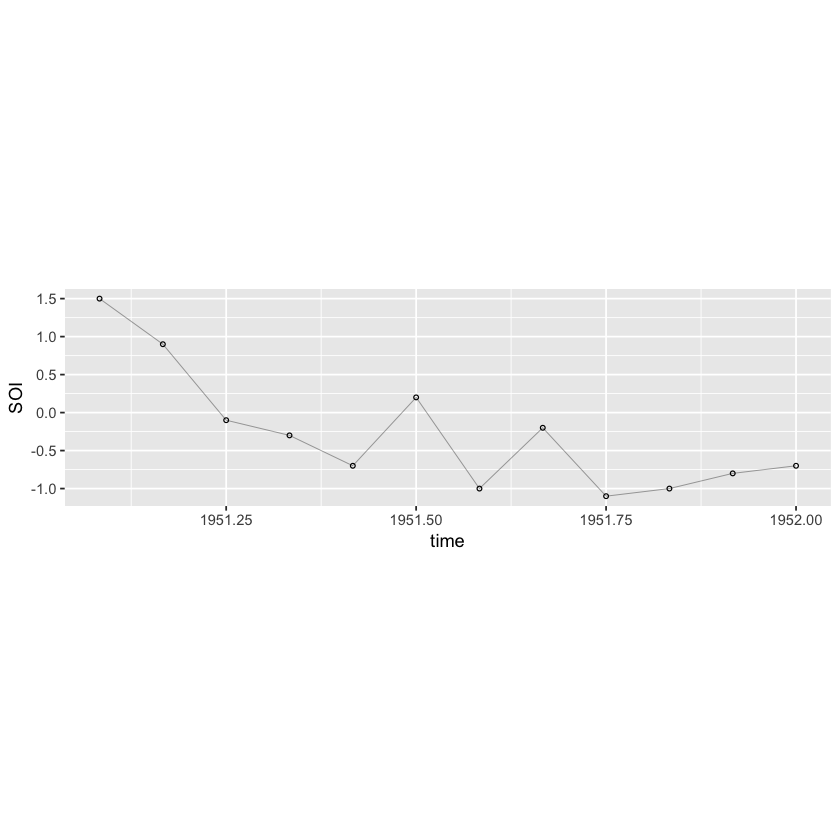

In [112]:
ggplot(df1[1:12,], aes(x=time, y=SOI)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .1)  